In [141]:
#Dependencies
import tweepy
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [142]:
#Twitter API Keys
consumer_key = "69d3EgGZ5Vs0Cc5cGozn6bIAu"
consumer_secret = "mA9UTfH3HYJpzYIFZ7UV6DcEUvXGZjffaXshxUPAj8nTH6AQly"
access_token = "202423493-d1vv3RbDO7yusoiyWNrXmD1vqDvMMtjwkz042gOj"
access_token_secret = "ZAojlTxZA6Y1vN8wsnEfTnu7E6rIHGBuPVAX8TwTk5dNA"

In [143]:
#Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [144]:
#Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

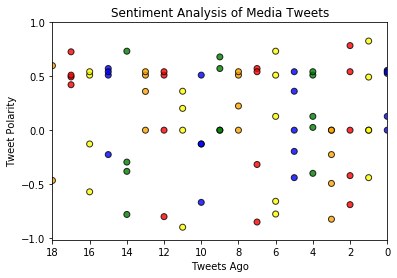

In [171]:
# Target Search Term
newsOrgs = ['@CNNbrk', '@FoxNews', '@BBCNews', '@CBS', '@nytimes']
results_list = []

for org in newsOrgs:
    # Lists to hold sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    index = []
    count = 0 
    
    # Grab 100 tweets; the count=100 grabs 100 tweets; we also want to get the most recent tweets
    public_tweets = api.search(org, count=100, result_type="recent")
    
        # Looping through all tweets
    for tweet in public_tweets["statuses"]:

        # Running Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
    
        # Adding each value to the appropriate array
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        index.append(count)
        count = count + 1

    plt.scatter(index, compound_list, facecolors=["blue", "yellow", "red", "orange", "green"], edgecolors="black", linewidth=1, marker='o', alpha=0.8)
    plt.title('Sentiment Analysis of Media Tweets')
    plt.xlabel("Tweets Ago")
    plt.ylabel('Tweet Polarity')
    plt.legend
    plt.xlim(len(compound_list), 0)
    plt.yticks([-1, -.5, 0, .5, 1])
#         plt.savefig("Sentiment Analysis.png")
#     plt.show()   
        
# Store the Average Sentiments
    sentiment = {"News Organization": org,
                 "Compound": np.mean(compound_list),
                 "Positive": np.mean(positive_list),
                 "Negative": np.mean(negative_list),
                 "Neutral": np.mean(neutral_list)}
    results_list.append(sentiment)
    
#This is to show my scatter plot    
plt.show()


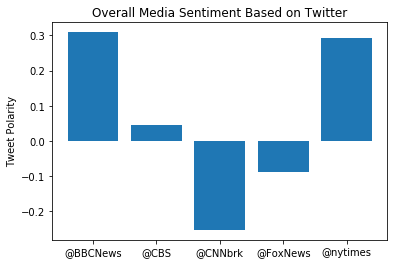

In [175]:
compounds = []
for sentiment in results_list:
    compounds.append(sentiment["Compound"])
    
# Give our chart some labels and a tile
plt.title("Overall Media Sentiment Based on Twitter")
plt.ylabel("Tweet Polarity")
    
plt.bar(newsOrgs, compounds)
plt.show()

In [173]:
newsOrgs_df = pd.DataFrame(results_list).set_index('News Organization').round(3).reset_index()
newsOrgs_df.head()

,News Organization,Compound,Negative,Neutral,Positive
0,@CNNbrk,-0.253,0.228,0.653,0.120
1,@FoxNews,-0.089,0.116,0.807,0.077
2,@BBCNews,0.309,0.032,0.776,0.192
3,@CBS,0.046,0.084,0.806,0.110
4,@nytimes,0.291,0.118,0.706,0.175


In [179]:
newsOrgs_df.to_csv("NewsMood.csv", encoding='utf-8', index=False)